In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Simulate genotype data (100 individuals, 500 SNPs)
np.random.seed(42)
X = np.random.randint(0, 3, size=(100, 500))  # 100 individuals, 500 SNPs

# Simulate the effect sizes for 500 SNPs
effect_sizes = np.random.normal(0, 0.1, 500)

# Compute Polygenic Risk Score (PRS)
prs = X @ effect_sizes  # Matrix multiplication

# Convert PRS into probabilities using the sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

probability = sigmoid(prs)  # Probabilities from PRS

# Generate disease outcomes (1 = stroke, 0 = no stroke)
y = np.random.binomial(1, probability)

In [16]:
# Compute the cost (log-loss)
def compute_cost(X, y, theta):
    m = len(y)  # Number of examples
    predictions = sigmoid(np.dot(X, theta))  # Predictions (probabilities)
    cost = - (1/m) * np.sum(y * np.log(predictions) + (1 - y) * np.log(1 - predictions))  # Log-loss
    return cost

In [17]:
# Gradient Descent to learn theta (weights)
def gradient_descent(X, y, theta, learning_rate, iterations):
    m = len(y)  # Number of examples
    cost_history = []  # Store cost history for visualization
    
    for _ in range(iterations):
        predictions = sigmoid(np.dot(X, theta))  # Predictions
        gradient = np.dot(X.T, (predictions - y)) / m  # Compute the gradient
        theta -= learning_rate * gradient  # Update theta
        cost_history.append(compute_cost(X, y, theta))  # Track the cost for each iteration
    
    return theta, cost_history

In [18]:
# Add the bias term (column of ones) to X
X_bias = np.c_[np.ones((X.shape[0], 1)), X]  # Add a column of ones to the X matrix (bias term)

In [19]:
# Initialize theta (weights)
theta_initial = np.zeros(X_bias.shape[1])  # Initialize theta to zeros

In [20]:
# Set learning rate and number of iterations
learning_rate = 0.01
iterations = 1000

# Run gradient descent to find the optimal theta (weights)
theta_final, cost_history = gradient_descent(X_bias, y, theta_initial, learning_rate, iterations)

# Print the final learned theta values (weights)
print("Final learned theta:", theta_final)

Final learned theta: [ 1.94885930e-04  1.92820851e-02 -8.02153398e-02  2.99258323e-02
 -1.49105181e-01 -4.48215520e-02  9.34259089e-02 -1.09832335e-01
 -7.17838520e-02 -8.62015669e-02  2.66443675e-02  3.09682731e-02
 -2.22405584e-02 -1.13910785e-01  4.13673780e-02 -9.87900643e-02
  1.52311734e-02  2.05683591e-02  7.36004643e-02 -3.41928903e-02
  1.40550371e-01  9.85887153e-02  1.21863699e-04  4.51093099e-02
 -8.79576138e-03  9.64765691e-02  7.83277997e-02 -1.01159114e-02
 -2.03024674e-02  8.56800581e-03 -3.18309150e-02 -5.14802942e-02
  1.32451789e-02  6.17950404e-02  8.67824480e-02 -1.73587530e-01
 -7.24141955e-02  2.56346547e-02  5.79083611e-02  4.15179230e-02
 -8.79299571e-02 -5.32127779e-02  1.17011329e-01  4.36991125e-02
  4.05756219e-02 -9.16130866e-02  7.55920548e-02  1.25770513e-01
 -2.21500679e-01  3.00950879e-02 -1.73744612e-02 -1.00614314e-01
  1.65887784e-01 -2.33762571e-02 -1.29808837e-02 -3.87603389e-02
  7.84063025e-02 -5.04085554e-03 -9.17418240e-02  5.45197400e-02
 -4.

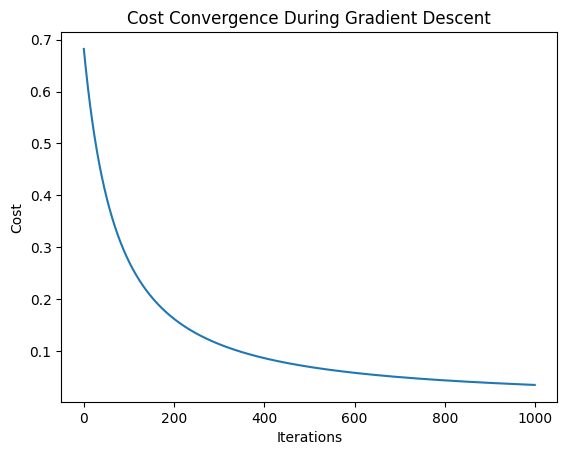

In [21]:
# Plot cost convergence during training
plt.plot(range(len(cost_history)), cost_history)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Cost Convergence During Gradient Descent")
plt.show()

In [22]:
# Get model predictions (probabilities)
predictions_prob = sigmoid(np.dot(X_bias, theta_final))

# Convert probabilities to binary predictions (0 or 1)
predictions = (predictions_prob >= 0.5).astype(int)  # Threshold at 0.5 for classification

In [23]:
# Calculate accuracy
accuracy = np.mean(predictions == y)  # Compare predictions to true labels
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 100.00%


In [24]:
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y, predictions)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[53  0]
 [ 0 47]]


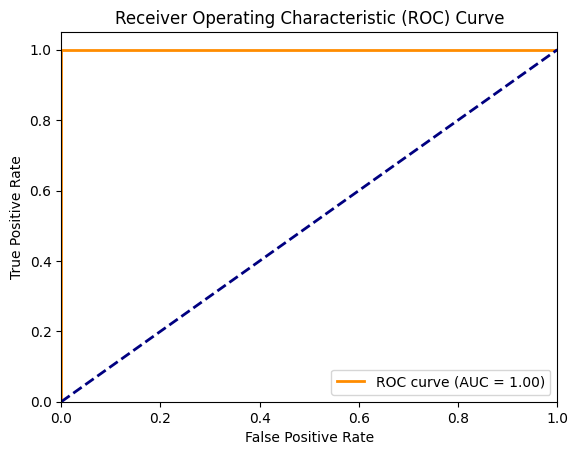

In [25]:
from sklearn.metrics import roc_curve, auc

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y, predictions_prob)

# Compute AUC (Area Under Curve)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Random classifier line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()